Please run this file in google collab to view all the graphns and output properly

# News Validation using BERT Model Python

## Data Import

In [ ]:
# Installing all the dependencies
!pip install transformers
!pip install pydot

In [ ]:
# importing all the required libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report

Loading the data

In [ ]:
%pwd
%ls

df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

Fake.csv  model.png  sample_data/  True.csv


Checking the top 10 rows from both the files

In [ ]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


To differentiate between the Fake and True News, we will add a new Column "Label".This will be our dependent Column and then we will merge both the dataframes into a single dataframe

In [ ]:
# adding new column lable
df_fake["Label"] = "Fake"
df_true["Label"] = "True"

In [ ]:
# merging both the DataFrames and Shuffling it
df = pd.concat([df_fake,df_true])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Analysing the new dataframe
df.head(10)

,title,text,subject,date,Label
0,"HILLARY SUPPORTER, PROMINENT LAWYER Alan Dersh...","In today s distorted world of human rights, ...",politics,"Feb 25, 2017",Fake
1,ROY MOORE WITCH HUNT UNRAVELLING: More Witness...,This is truly shocking! Roy Moore takes a comm...,politics,"Nov 21, 2017",Fake
2,Gorbachev sees Russian democracy far off: biog...,NEW YORK (Reuters) - Former Soviet leader Mikh...,worldnews,"November 6, 2017",True
3,At least five killed as police fire at protest...,ADDIS ABABA (Reuters) - At least five people w...,worldnews,"October 26, 2017",True
4,"We'll buy arms from Russia, Philippines' Duter...","DANANG, Vietnam (Reuters) - Philippine Preside...",worldnews,"November 10, 2017",True
5,FL Toddler Shoots Himself In The Face After ‘...,A Florida two-year-old is in critical conditio...,News,"January 5, 2016",Fake
6,"Ivanka Defends Malia Obama From Attacks, Her ...",Ivanka Trump and Chelsea Clinton defended Mali...,News,"November 24, 2017",Fake
7,Iran fulfilling nuclear deal commitments: IAEA...,ABU DHABI (Reuters) - Iran is fulfilling its c...,worldnews,"October 30, 2017",True
8,WHITE STUDENT UNION At CA University Mocks #BL...,Because everyone deserves a safe space right?...,politics,"Dec 4, 2015",Fake
9,Balkan police break up Turkish migrant smuggli...,SARAJEVO (Reuters) - Police in the Balkans hav...,worldnews,"September 14, 2017",True


Check the dataframe for nul values

In [ ]:
# looking for null values in the dataframe
df.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

As seen in the result above, there are no null values in our dataframe

## Data Analysis

Now lets analyse the data and see the patterns in it

<ipython-input-97-c9b1452b7956>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_fake.subject, palette = 'Set1', alpha = 0.5, ax = axes[0])
<ipython-input-97-c9b1452b7956>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_true.subject, palette = 'Set1', alpha = 0.5, ax = axes[1])


Text(0.5, 1.0, 'True  News Subject Values')

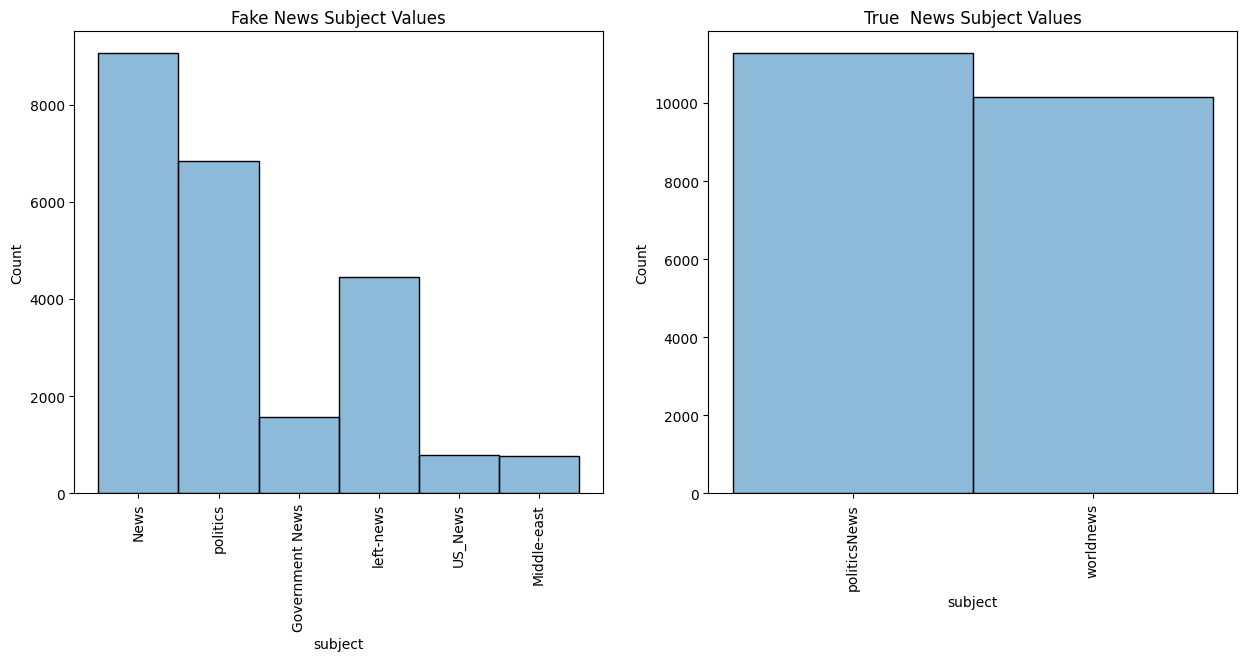

In [ ]:
#Creating a plot to demostrate the subject values for Fake and true news
fig, axes = plt.subplots(1,2, figsize = (15,6))
#Adding the histogram1 - Fake News
sns.histplot(df_fake.subject, palette = 'Set1', alpha = 0.5, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].set_title('Fake News Subject Values')
#Adding the histogram2 - True News
sns.histplot(df_true.subject, palette = 'Set1', alpha = 0.5, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 90)
axes[1].set_title('True  News Subject Values')


In [ ]:
#Printing the count of Subject
print("Fake News Subject Values : ",dict(df_fake.subject.value_counts()))
print("True News Subject Values : ",dict(df_true.subject.value_counts()))

Fake News Subject Values :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}
True News Subject Values :  {'politicsNews': 11272, 'worldnews': 10145}


It is quiet evident that subject has different values for the two merged dataframe, so we will eliminate it.

Now, Lets check it the data is balances or not by plotting fake news agaings True news

<ipython-input-99-d27b0756c57f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df.Label, palette = 'Set1', alpha = 0.5)


Text(0.5, 1.0, 'True News VS Fake News')

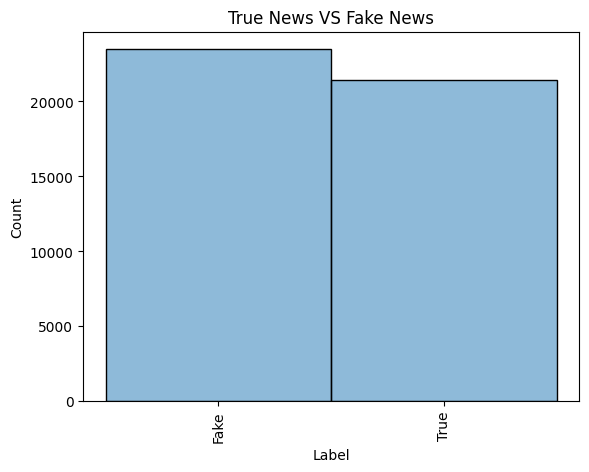

In [ ]:
sns.histplot(df.Label, palette = 'Set1', alpha = 0.5)
plt.tick_params(axis = 'x', rotation = 90)
plt.title('True News VS Fake News')


In [ ]:
#Printing counts of fake and true news
df.Label.value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

In [ ]:
#Taking text and title as X
X = df["title"]+df["text"]
X.head()

print(X.size)


44898


In [ ]:
# Encoding Label column from object to numerical value using the pyhton map() function
# Classifying True as 1 and Fake as 0
y = df['Label'].map({'True':1, 'Fake':0})
y.head()

print(X.size)

44898


In [ ]:
#Spliting the entire data into Train and Test data using the train_test_split() method

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 10)

## Model implementation and data validation

Since transformers cannot process the raw input text directly, So we wil to tokenize the data and convert it into numbers. Tokenization performs the following functions — It splits input text into tokens (words, letters, etc.), Mapping each token with a unique integer and arranging them according to the model.

Here we will usr the Autotokenizer from the BERT model for this purpose

In [ ]:
# defining the tokenizer function

def tokenize(X):
    X = tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
#Tokenizing the data
X_train_tokens = tokenize(X_train)
X_test_tokens = tokenize(X_test)

## Designing the model

Setting up the values for the BERT model

In [ ]:
# Defining Base BERT model
def get_model():
    dropout_rate = 0.2
    input_ids = Input(shape=(100,), dtype=tf.int32, name='input_ids')  # Replace 128 with your desired sequence length
    input_mask = Input(shape=(100,), dtype=tf.int32, name='input_mask')  # Replace 128 with your desired sequence length
    embeddings = bert([input_ids, input_mask])[1]  # pooler output
    out = Dropout(0.2)(embeddings)
    out = Dense(64, activation='relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1, activation='sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True

    # Define a learning rate schedule
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-5,
        decay_steps=10000,  # Adjust this as needed
        decay_rate=0.9)

    optimizer = Adam(learning_rate=learning_rate, epsilon=1e-08, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Loading the defined bert model
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Plotting the created model

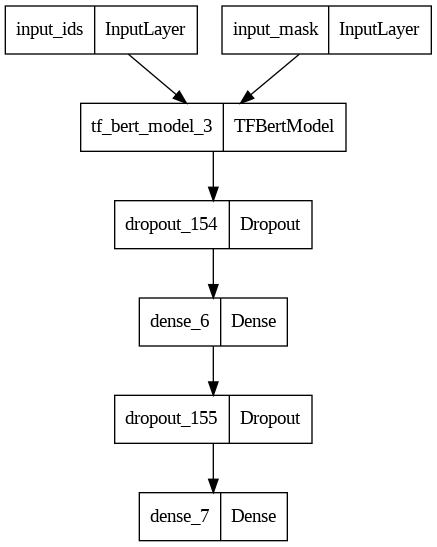

In [ ]:
# Plotting the layes of the created model
model = get_model()
tf.keras.utils.plot_model(model)

Traning the created model with the training dataset

In [ ]:

history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],'input_mask':X_train_tokens['attention_mask']}, y = y_train, epochs=1, validation_split = 0.2, batch_size = 64, callbacks=[EarlyStopping( monitor='val_accuracy' ,mode='max', patience=3,verbose=False,restore_best_weights=True)])

449/449 [==============================] - 8613s 19s/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0024 - val_accuracy: 0.9997


We received an accuracy of 98 % through our model. The accuracy could be increased by increasing the value of epochs, which we reduced to cut down the operation time and resources untilized by the mode for this lesson.

Now this same model can be used to check the authenticity of the news from other sources too.

In [ ]:
y_predict = np.where(model.predict({ 'input_ids' : tokenize(X_test)['input_ids'] , 'input_mask' : tokenize(X_test)['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 835s 3s/step


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

